Reducción de Dimensionalidad y Benchmarking de Modelos (Core)

## Descripción:

En este proyecto, aplicarás una combinación de técnicas avanzadas, comenzando por un análisis de reducción de dimensionalidad (como PCA) y luego realizarás un benchmark de diferentes modelos de machine learning para encontrar el que mejor se adecue a los objetivos específicos del dataset que has elegido.

## Objetivo:

El objetivo es realizar un análisis exhaustivo que comience con la reducción de dimensionalidad para simplificar el dataset y luego probar varios modelos de machine learning para determinar cuál ofrece el mejor rendimiento en términos de precisión, recall, F1-score u otras métricas relevantes para tu problema.

## Instrucciones

### 1. Selección del dataset:

* Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
* Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

2. Reducción de dimensionalidad:

* Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
* Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
* Utiliza las características reducidas para simplificar el conjunto de datos.


### 3. Benchmarking de modelos:

* Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
    * Regresión logística
    * Árboles de decisión
    * Random Forest
    * Support Vector Machines (SVM)
* Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

### 4. Análisis comparativo de modelos:

* Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
* Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

### 5. Informe final:

* Elabora un informe detallado que incluya:
    * El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
    * Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
    * Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.

# Resolución

## 1. Selección de Dataset

Dataset elegido: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/breast-cancer-wisconsin-data" (use force=True to force download)


In [2]:
import pandas as pd


camino_ds = "../data/breast-cancer-wisconsin-data/data.csv"
df = pd.read_csv(camino_ds)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.drop(columns=["Unnamed: 32", "id"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
diagnosis,569,0,0.0
compactness_se,569,0,0.0
symmetry_worst,569,0,0.0
concave points_worst,569,0,0.0
concavity_worst,569,0,0.0
compactness_worst,569,0,0.0
smoothness_worst,569,0,0.0
area_worst,569,0,0.0
perimeter_worst,569,0,0.0
texture_worst,569,0,0.0


No parecen haber datos nulos en el dataset.

In [7]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


Tampoco se visualizan datos duplicados.

In [8]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'diagnosis': ['M' 'B']
Columnas convertidas a booleanas: []


In [9]:
def _convertir_diganosis(x):
    return x == 'M'



df["diagnosis"] = df["diagnosis"].apply(_convertir_diganosis).astype("boolean")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    boolean
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()

columnas_objeto_cadena

[]

No se visualizan cadenas de tipo objeto o cadena, por lo cual, no será necesario convertir estos datos.

In [12]:
columnas_flotantes = df.select_dtypes(include="float64")

columnas_convertidas_a_entero = []


def _convertir_a_entero(x):
    if not x.is_integer():
        raise ValueError(f"Valor {x} no es entero")
    return int(x)


for columna in columnas_flotantes:
    datos_columna = df[columna]

    try:
        datos_columna.apply(_convertir_a_entero)
        print(f"Columna '{columna}' es entera. Se procede a convertirla.")
        df[columna] = df[columna].astype("int64")
        columnas_convertidas_a_entero.append(columna)
    except Exception:
        print(f"Columna '{columna}' no es entera. Se mantiene como está.")


print("\n")
print(f"Columnas convertidas a entero: {str(columnas_convertidas_a_entero)}")

Columna 'radius_mean' no es entera. Se mantiene como está.
Columna 'texture_mean' no es entera. Se mantiene como está.
Columna 'perimeter_mean' no es entera. Se mantiene como está.
Columna 'area_mean' no es entera. Se mantiene como está.
Columna 'smoothness_mean' no es entera. Se mantiene como está.
Columna 'compactness_mean' no es entera. Se mantiene como está.
Columna 'concavity_mean' no es entera. Se mantiene como está.
Columna 'concave points_mean' no es entera. Se mantiene como está.
Columna 'symmetry_mean' no es entera. Se mantiene como está.
Columna 'fractal_dimension_mean' no es entera. Se mantiene como está.
Columna 'radius_se' no es entera. Se mantiene como está.
Columna 'texture_se' no es entera. Se mantiene como está.
Columna 'perimeter_se' no es entera. Se mantiene como está.
Columna 'area_se' no es entera. Se mantiene como está.
Columna 'smoothness_se' no es entera. Se mantiene como está.
Columna 'compactness_se' no es entera. Se mantiene como está.
Columna 'concavity_se'

No se encontró ninguna cadena entera que fue interpretada como flotante.

### Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

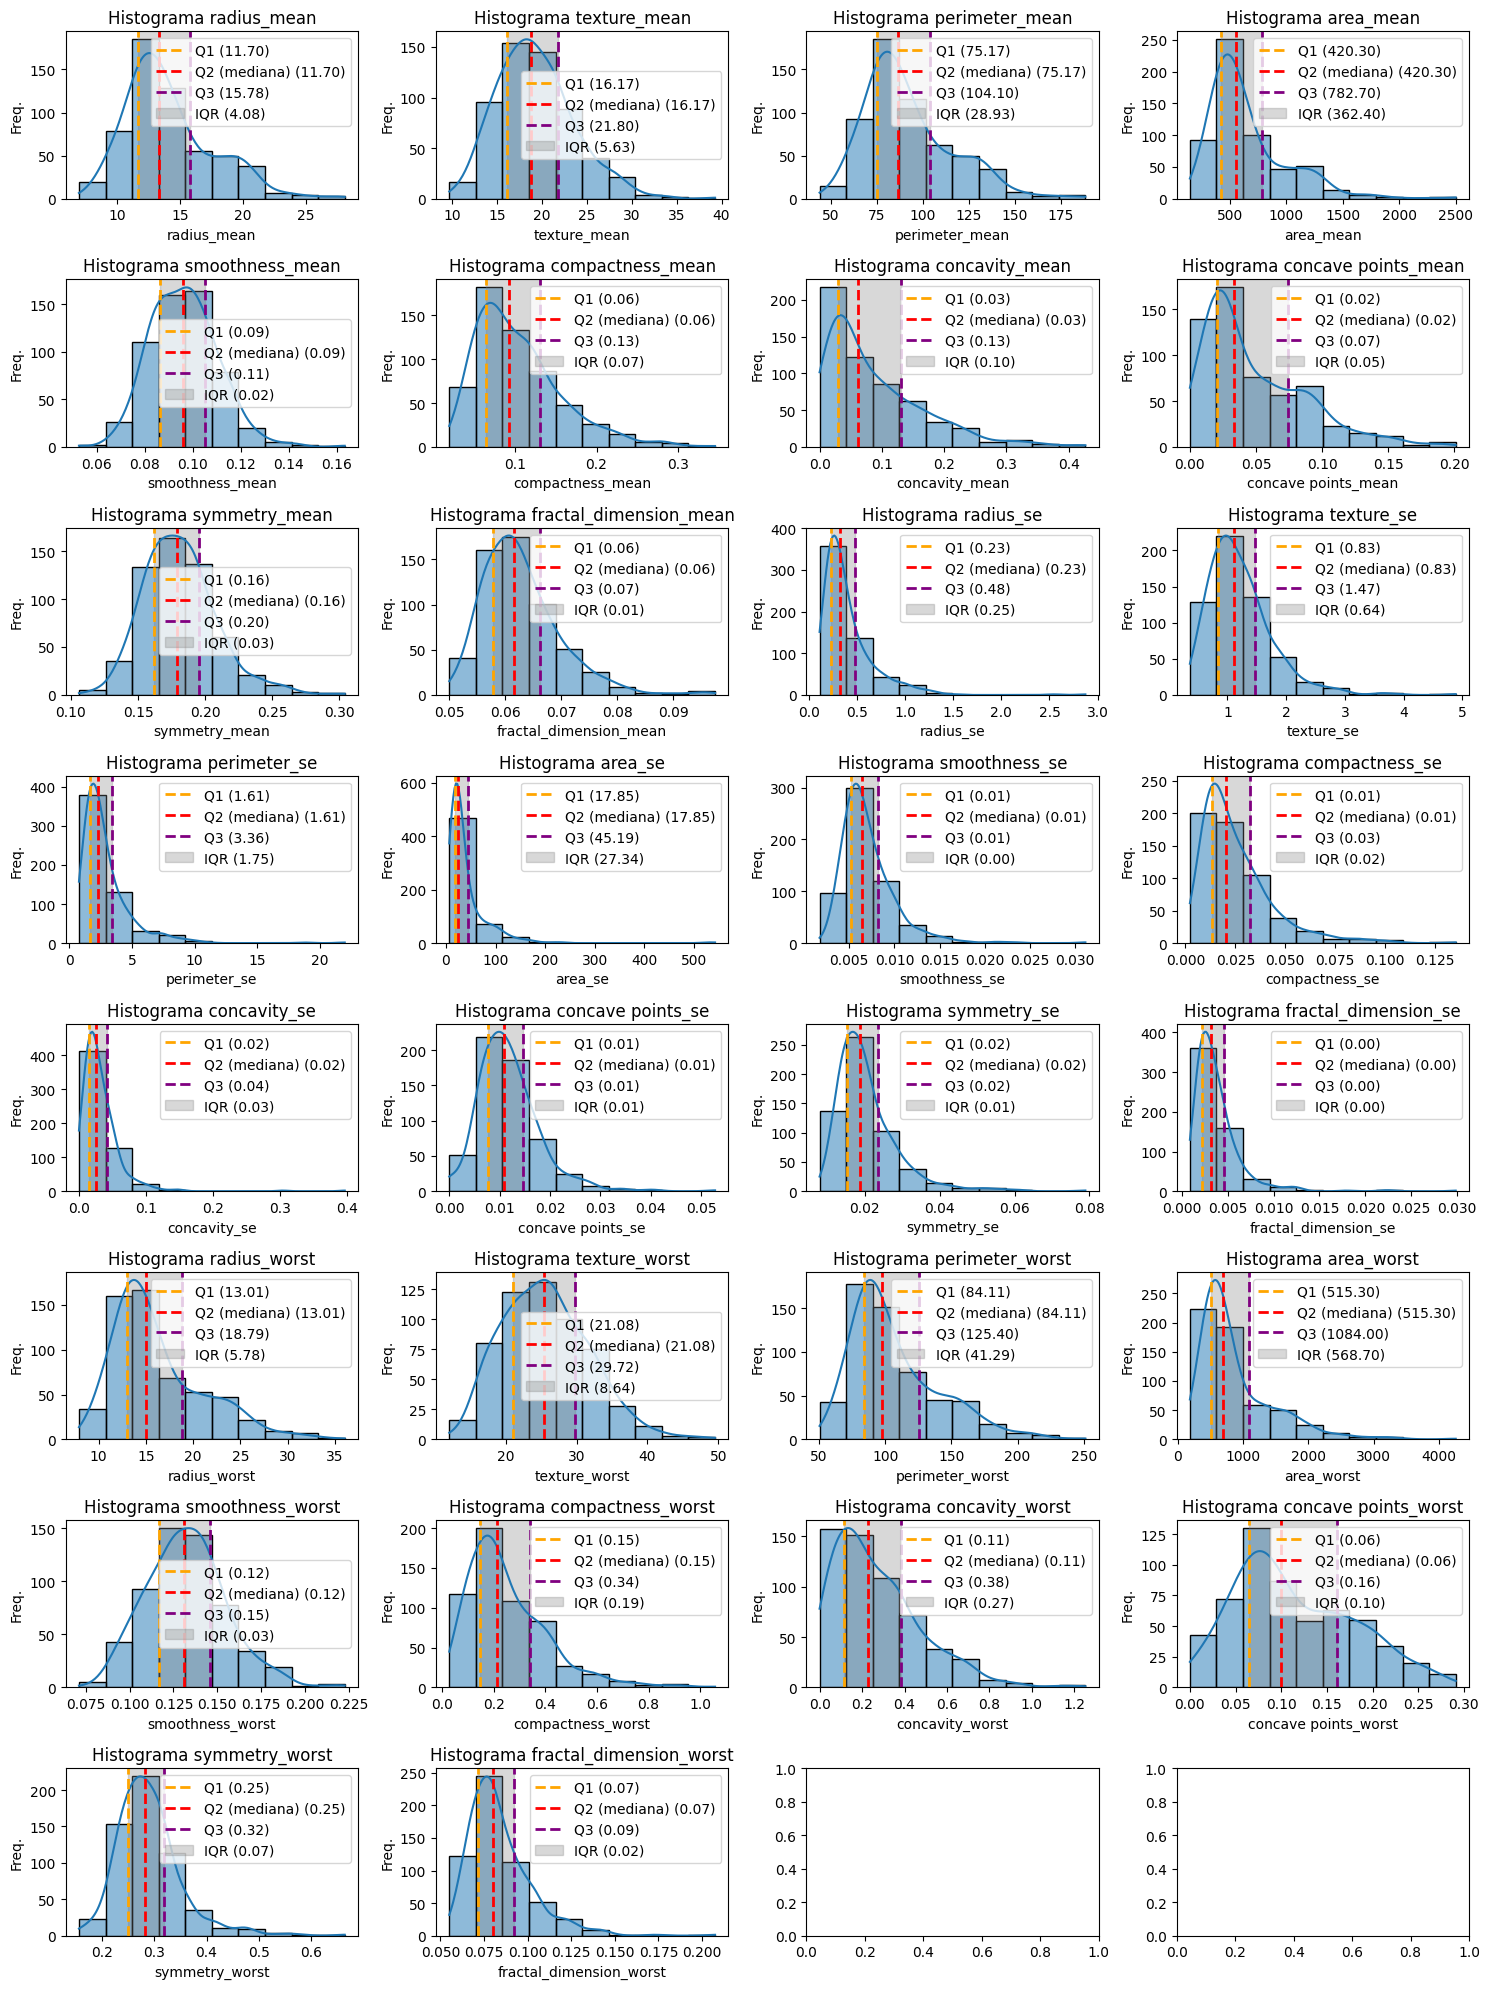

In [13]:
from utils.eda_utils import graficar_histogramas

columnas_numericas = df.columns.tolist()
columnas_numericas.remove("diagnosis")


graficar_histogramas(df, columnas_numericas, 4, bins=10, kde=True, figsize=(15, 20))

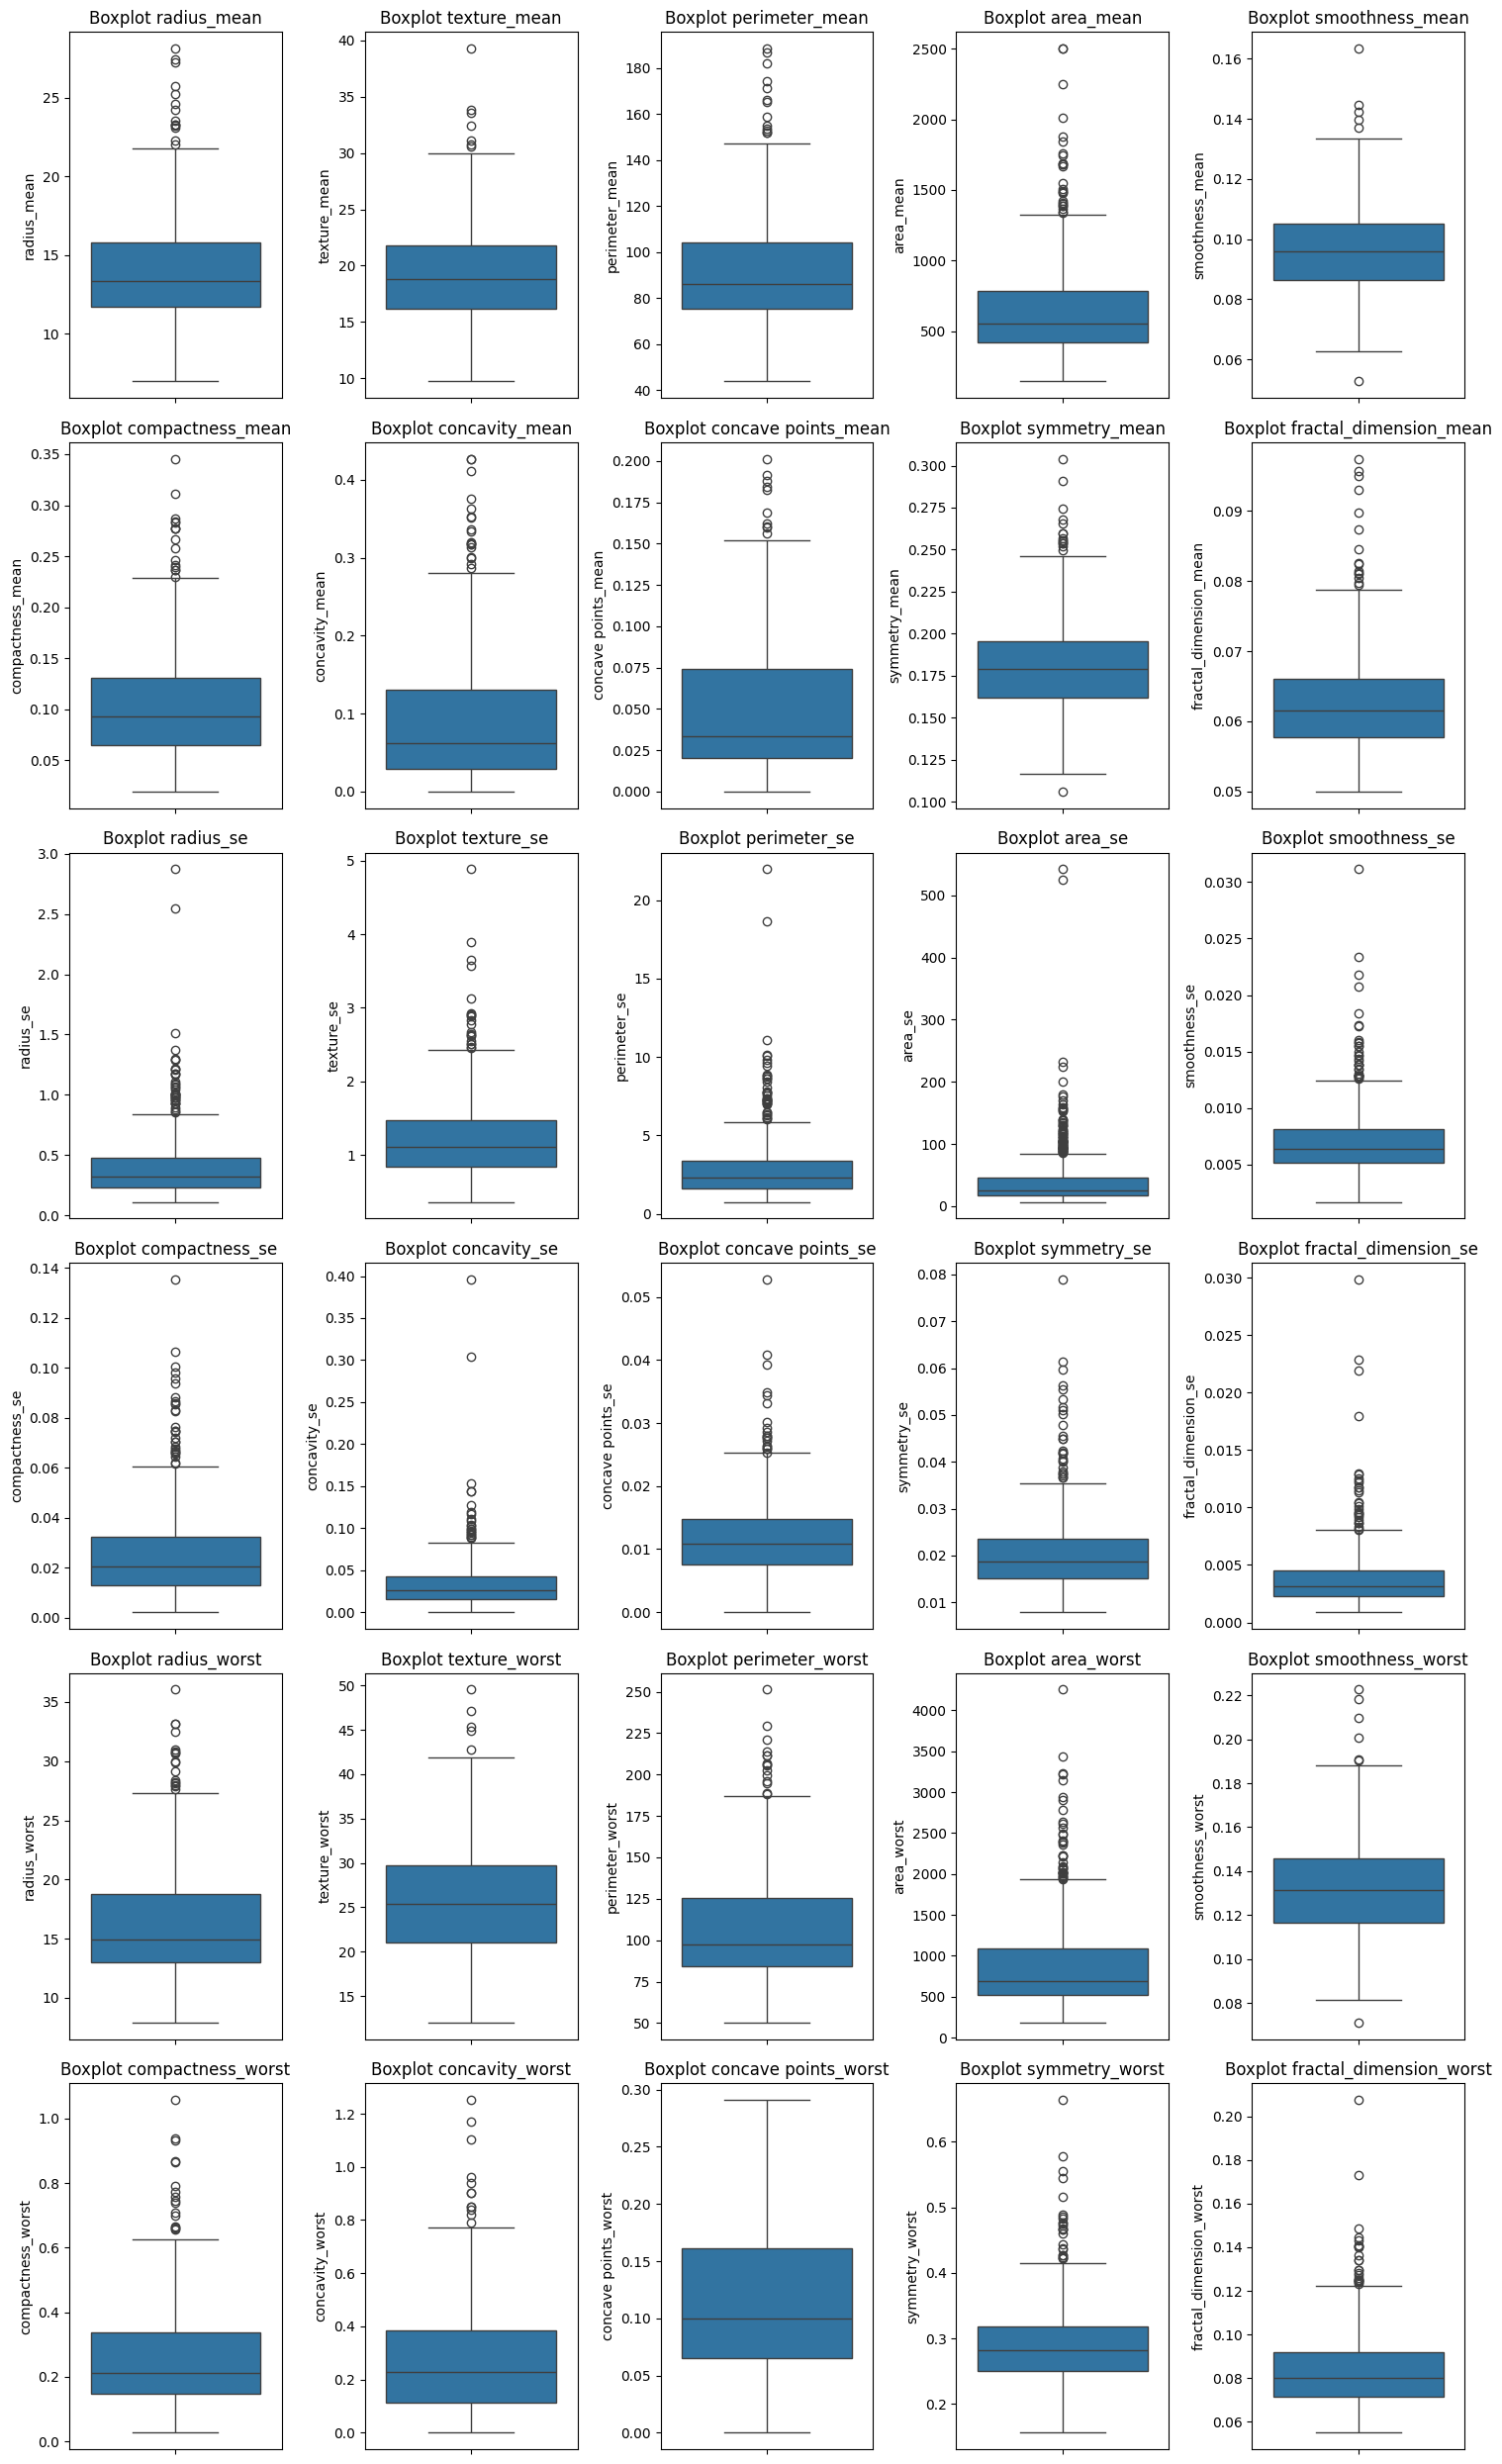

In [14]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=5, figsize=(15, 25))

Como existen muchos outliers en el dataset, la técnica elegida de escalamiento es RobustScaler.

In [15]:
correlaciones_precio = df[[*columnas_numericas] + ["diagnosis"]].corr()["diagnosis"]
# Se selecciona este threshold.
threshold_correlaciones = 0.1

columnas_seleccionadas = correlaciones_precio[abs(correlaciones_precio) > threshold_correlaciones].index.drop("diagnosis").tolist()

columnas_seleccionadas

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
radius_se                   0.679090      0.275869        0.691765   0.732562   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     

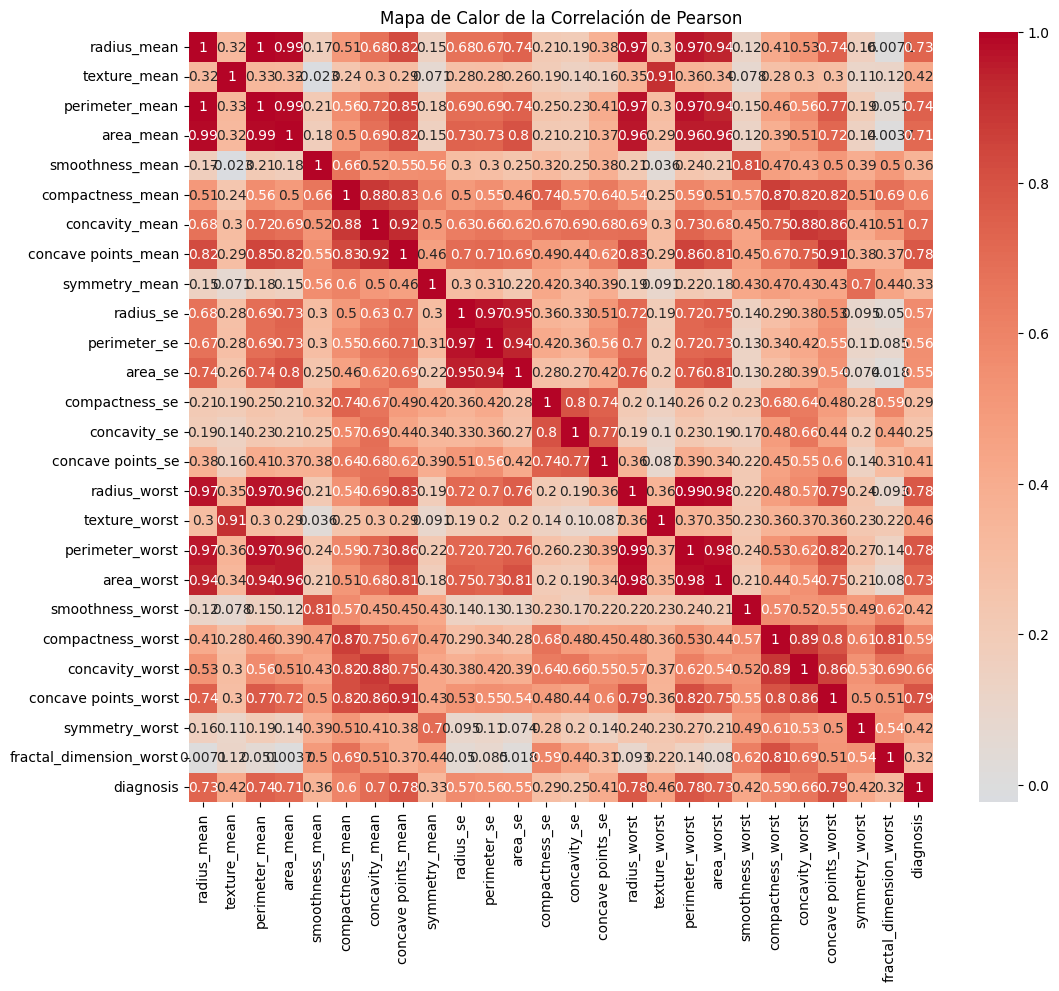

In [16]:
from utils.eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_seleccionadas + ["diagnosis"], figsize=(12, 10))

Podemos notar una gran correlación en muchas de las columnas con diagnosis, lo que hace este dataset ideal para aplicar la técnica de PCA:

## 2. Reducción de dimensionalidad:

### Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.

Importamos las librerías necesarias.

In [17]:
# Visualización
import matplotlib.pyplot as plt
from utils.classification_utils import graficar_matriz_confusion

# Modelado
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

# Métricas
# Evaluación
from utils.classification_utils import calcular_metricas_modelo, calcular_resumen_metricas_modelos

In [18]:
print(columnas_numericas)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [19]:
X = df[columnas_numericas]
y = df["diagnosis"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

In [21]:
preprocessor_scale = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), columnas_numericas),
    ],
    remainder="passthrough"
)

n_components = 10

pca = Pipeline(steps=[
    ("preprocessor", preprocessor_scale),
    ("pca", PCA(n_components=10)),
])

In [22]:
X_train_pca = pca.fit_transform(X_train)

###  Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.

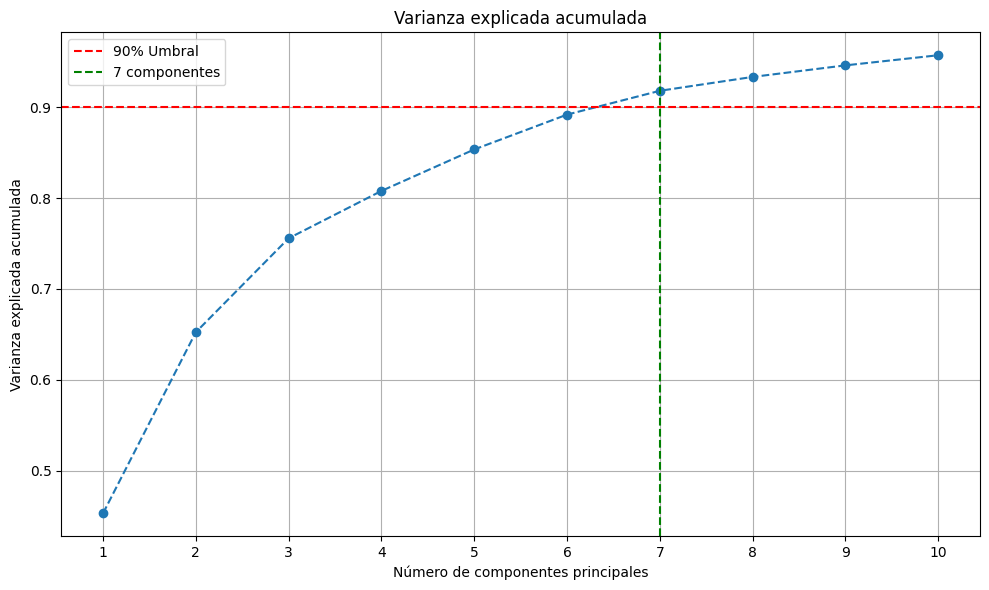

Variación explicada acumulada:
Componente 1: 45.30%
Componente 2: 65.24%
Componente 3: 75.57%
Componente 4: 80.79%
Componente 5: 85.35%
Componente 6: 89.19%
Componente 7: 91.81%
Componente 8: 93.34%
Componente 9: 94.61%
Componente 10: 95.72%


In [23]:
# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca.steps[-1][1].explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.xticks([n + 1 for n in range(n_components)])  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.tight_layout()
plt.savefig("../imgs/varianza_explicada_acumulada.png")
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

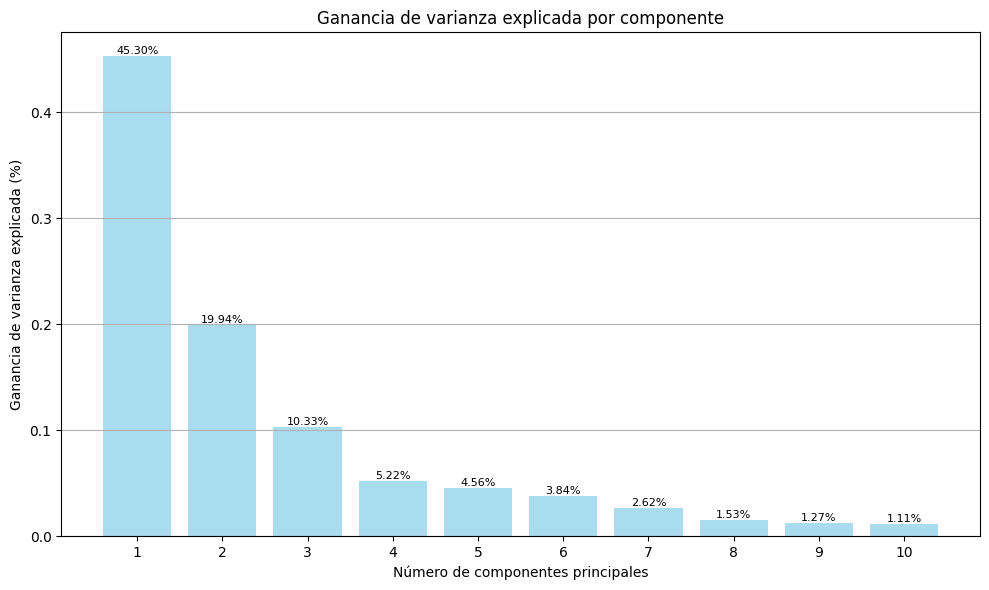

Ganancia de varianza explicada por componente:
Componente 1: 45.30%
Componente 2: 19.94%
Componente 3: 10.33%
Componente 4: 5.22%
Componente 5: 4.56%
Componente 6: 3.84%
Componente 7: 2.62%
Componente 8: 1.53%
Componente 9: 1.27%
Componente 10: 1.11%


In [24]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, n_components + 1))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.savefig("../imgs/ganancia_varianza_acumulada.png")
plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

De los resultados, podemos notar que a partir de 7 componentes, la varianza explicada ya supera el 90%, por lo que se opta por usar este nro de componentes para el entrenamiento.

### Utiliza las características reducidas para simplificar el conjunto de datos.

Se realizará en los pipelines de cada modelo.

### Implementa y compara al menos tres modelos de machine learning en el dataset reducido.

#### Regresión Logística

In [25]:
lr_model = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)         

lr = Pipeline(steps=[
    ("preprocessor", preprocessor_scale),
    ("pca", PCA(n_components=7)),
    ("model", lr_model)
])

lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('pca', PCA(n_components=7)),
                ('model', LogisticRegression(random_state=42))])

In [26]:
calcular_metricas_modelo(lr, X_test, y_test, "Regresión Logística", calcular_roc_auc=True)

Accuracy Regresión Logística: 0.9883040935672515
Precision Regresión Logística: 0.9841269841269841
Recall Regresión Logística: 0.9841269841269841
F1 Regresión Logística: 0.9841269841269841
ROC AUC Regresión Logística: 0.9988242210464433


#### Regresión Logística sin PCA

In [27]:
lr_model = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=10000,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)         

lr_sin_pca = Pipeline(steps=[
    ("model", lr_model)
])

lr_sin_pca.fit(X_train, y_train)

Pipeline(steps=[('model', LogisticRegression(max_iter=10000, random_state=42))])

In [28]:
calcular_metricas_modelo(lr_sin_pca, X_test, y_test, "Regresión Logística Sin PCA", calcular_roc_auc=True)

Accuracy Regresión Logística Sin PCA: 0.9766081871345029
Precision Regresión Logística Sin PCA: 0.9682539682539683
Recall Regresión Logística Sin PCA: 0.9682539682539683
F1 Regresión Logística Sin PCA: 0.9682539682539683
ROC AUC Regresión Logística Sin PCA: 0.9976484420928865


#### Random Forests

In [29]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor_scale),
    ("pca", PCA(n_components=7)),
    ("model", RandomForestClassifier(n_estimators=100))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('pca', PCA(n_components=7)),
                ('model', RandomForestClassifier())])

In [30]:
calcular_metricas_modelo(rf, X_test, y_test, "Random Forests", calcular_roc_auc=True)

Accuracy Random Forests: 0.9473684210526315
Precision Random Forests: 0.921875
Recall Random Forests: 0.9365079365079365
F1 Random Forests: 0.9291338582677166
ROC AUC Random Forests: 0.9917695473251028


#### Random Forests sin PCA

In [31]:
rf_sin_pca = Pipeline(steps=[
    ("model", RandomForestClassifier(n_estimators=100))
])

rf_sin_pca.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestClassifier())])

In [32]:
calcular_metricas_modelo(rf_sin_pca, X_test, y_test, "Random Forests sin PCA", calcular_roc_auc=True)

Accuracy Random Forests sin PCA: 0.9707602339181286
Precision Random Forests sin PCA: 0.967741935483871
Recall Random Forests sin PCA: 0.9523809523809523
F1 Random Forests sin PCA: 0.96
ROC AUC Random Forests sin PCA: 0.9968400940623163


#### XGBoost

In [33]:
xb = Pipeline(steps=[
    ("preprocessor", preprocessor_scale),
    ("pca", PCA(n_components=7)),
    ("model", xgb.XGBClassifier(random_state=42)),
])

xb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [34]:
calcular_metricas_modelo(xb, X_test, y_test, "XGBoost", calcular_roc_auc=True)

Accuracy XGBoost: 0.9532163742690059
Precision XGBoost: 0.9508196721311475
Recall XGBoost: 0.9206349206349206
F1 XGBoost: 0.9354838709677419
ROC AUC XGBoost: 0.9911816578483246


#### XGBoost sin PCA

In [35]:
xb_sin_pca = Pipeline(steps=[
    ("model", xgb.XGBClassifier(random_state=42)),
])

xb_sin_pca.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [36]:
calcular_metricas_modelo(xb_sin_pca, X_test, y_test, "XGBoost sin PCA", calcular_roc_auc=True)

Accuracy XGBoost sin PCA: 0.9707602339181286
Precision XGBoost sin PCA: 0.953125
Recall XGBoost sin PCA: 0.9682539682539683
F1 XGBoost sin PCA: 0.9606299212598425
ROC AUC XGBoost sin PCA: 0.9944150499706055


### Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

In [37]:
calcular_resumen_metricas_modelos(
    [lr, lr_sin_pca, rf, rf_sin_pca, xb, xb_sin_pca],
    X_test,
    y_test,
    [
        "Regresión Logística con PCA",
        "Regresión Logística sin PCA",
        "Random Forests con PCA",
        "Random Forests sin PCA",
        "XGBoost con PCA",
        "XGBoost sin PCA",
    ],
    calcular_roc_auc=True
)

                             Accuracy  Precision    Recall  F1-Score   ROC-AUC
Regresión Logística con PCA  0.988304   0.984127  0.984127  0.984127  0.998824
Regresión Logística sin PCA  0.976608   0.968254  0.968254  0.968254  0.997648
Random Forests con PCA       0.947368   0.921875  0.936508  0.929134  0.991770
Random Forests sin PCA       0.970760   0.967742  0.952381  0.960000  0.996840
XGBoost con PCA              0.953216   0.950820  0.920635  0.935484  0.991182
XGBoost sin PCA              0.970760   0.953125  0.968254  0.960630  0.994415


Mejores modelos por métrica:

Accuracy     Regresión Logística con PCA
Precision    Regresión Logística con PCA
Recall       Regresión Logística con PCA
F1-Score     Regresión Logística con PCA
ROC-AUC      Regresión Logística con PCA
dtype: object


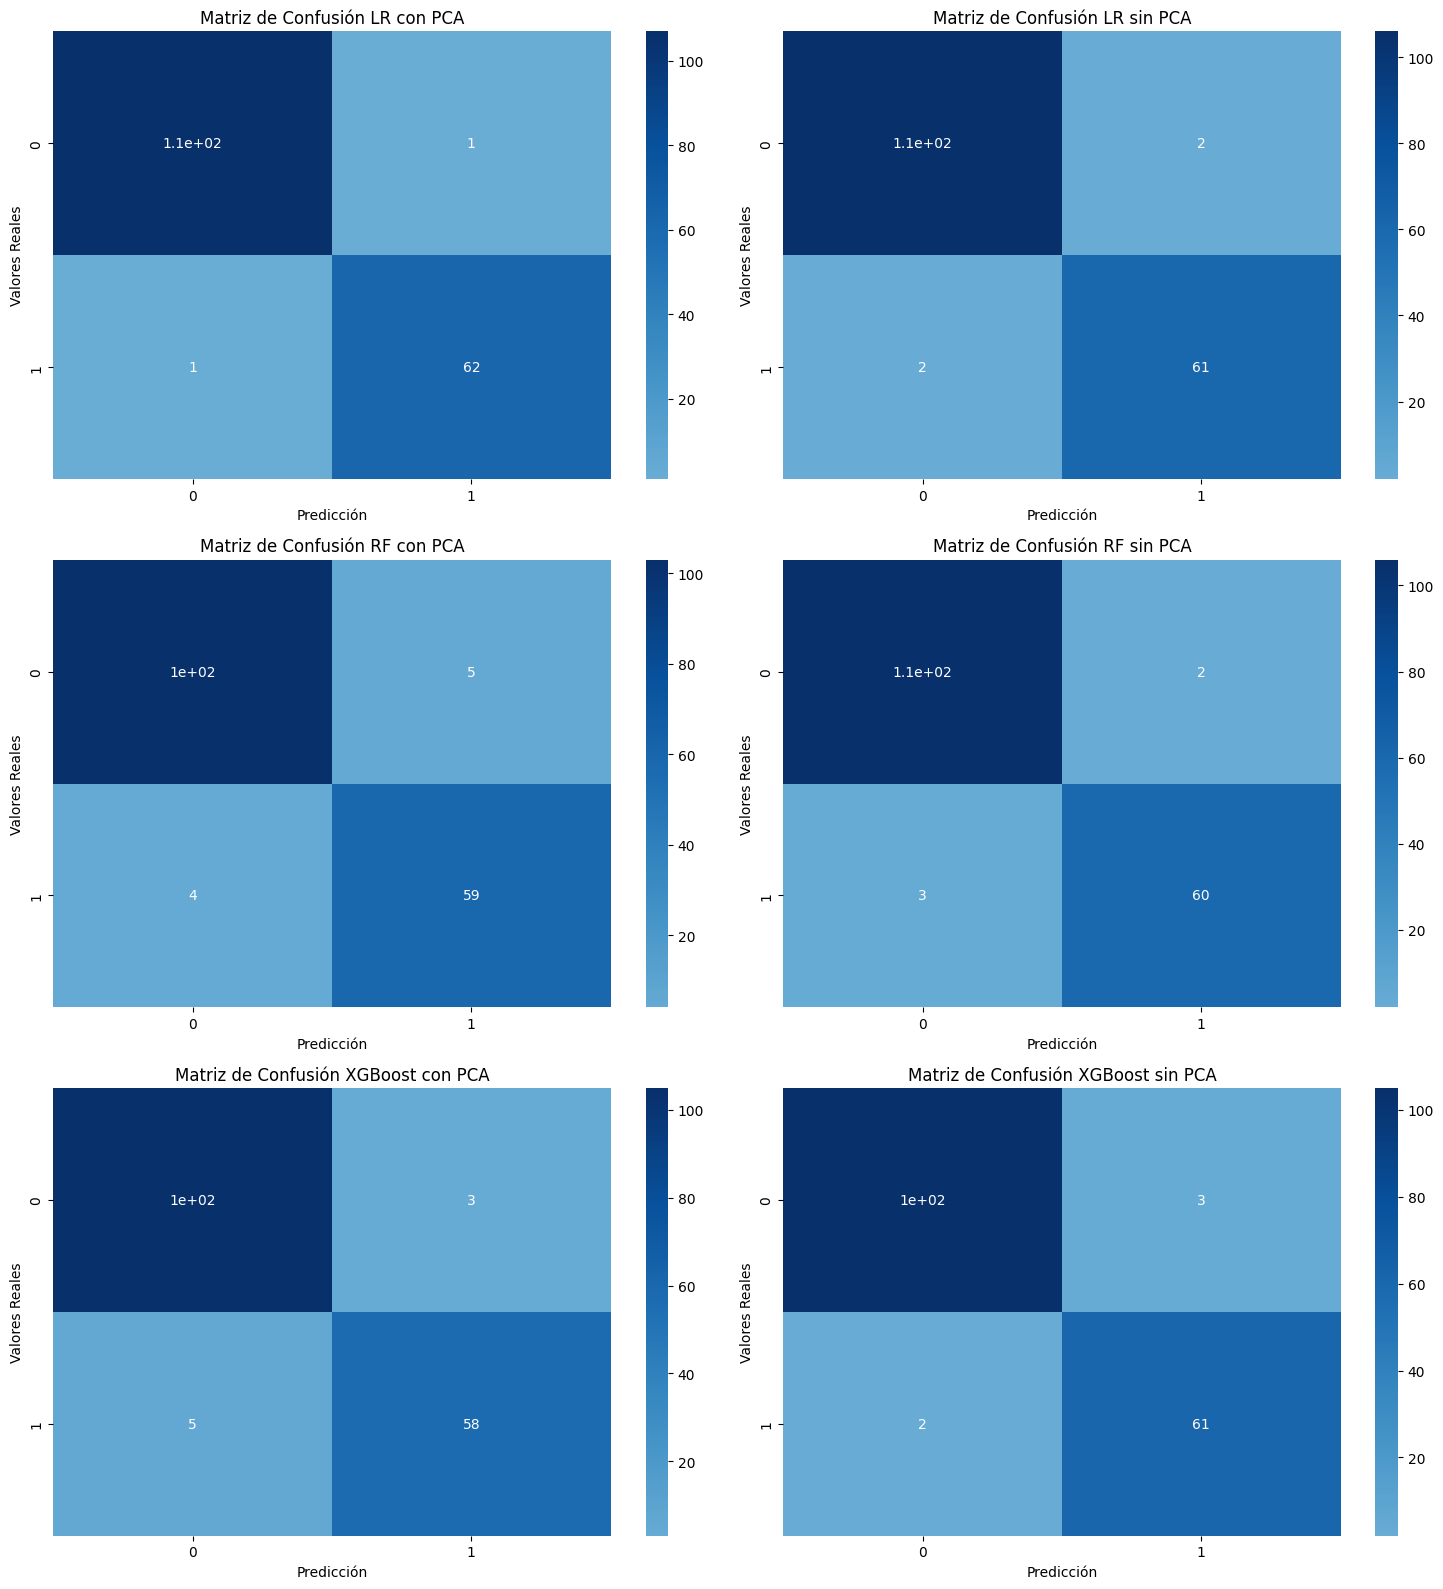

In [38]:
from sklearn.metrics import confusion_matrix

from utils.classification_utils import graficar_matrices_confusion

conf_matrix_lr = confusion_matrix(y_test, lr.predict(X_test))
conf_matrix_lr_sin_pca = confusion_matrix(y_test, lr_sin_pca.predict(X_test))
conf_matrix_rf = confusion_matrix(y_test, rf.predict(X_test))
conf_matrix_rf_sin_pca = confusion_matrix(y_test, rf_sin_pca.predict(X_test))
conf_matrix_xb = confusion_matrix(y_test, xb.predict(X_test))
conf_matrix_xb_sin_pca = confusion_matrix(y_test, xb_sin_pca.predict(X_test))


graficar_matrices_confusion(
    [
        conf_matrix_lr,
        conf_matrix_lr_sin_pca,
        conf_matrix_rf,
        conf_matrix_rf_sin_pca,
        conf_matrix_xb,
        conf_matrix_xb_sin_pca,
    ],
    [
        "LR con PCA",
        "LR sin PCA",
        "RF con PCA",
        "RF sin PCA",
        "XGBoost con PCA",
        "XGBoost sin PCA",
    ],
    nro_columnas=2,
    figsize=(15, 16),
    camino_salida="../imgs/matrices_confusion.png"
)

## 4. Análisis comparativo de modelos:

### Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.

De las métricas, podemos destacar lo siguiente:

* En el caso de la Regresión Logística, el modelo se beneficia con la reducción de dimensionalidad. Esto se puede deber a que un modelo como la regresión logística es un modelo lineal, en donde las correlaciones son importantes, y el PCA ayuda al modelo a enfocarse solo en las características con más correlaciones.
* En el caso de Random Forests, el modelo pierde rendimiento aplicando la reducción de dimensionalidad. Como este modelo no es un modelo lineal, posiblemente la pérdida de datos ocasionada por el PCA influya en el rendimiento.
* En el modelo XGBoost, el modelo también pierde rendimiento. Al no ser un modelo lineal basado en árboles, posiblemente no sea el mejor modelo para aplicar PCA.

De todos los resultados, la regresión lineal es la que más se beneficia de aplicar PCA. Adicionalmente, este modelo es el mejor en todas las métricas.

### Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

Se puede notar una leve disminución de rendimiento en los modelos de Random Forests y XGBoost, no obstante no es muy grande y se puede explicar teniendo en cuenta que el PCA beneficia más a modelos de tipo lineal.

## 5. Informe final:

* Reporte en Markdown: [reporte.md](../reportes/reporte.md)
* Reporte en PDF: [reporte.pdf](../reportes/reporte.pdf)